### Project - Classify the potential customers who can buy banking term plan based on the individual financial parameters

In [ ]:
df=pd.read_csv("bank.csv",sep=';')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as skl
%matplotlib inline

In [ ]:
df.head(10) # checking the topmost entries of the dataset

In [ ]:
df.shape # shape and size of dataset

(41188, 21)

In [ ]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
df.info() # for checking datatypes and null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

### Basic EDA for visualizing intial dataset

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>,
        <Axes: title={'center': 'emp.var.rate'}>],
       [<Axes: title={'center': 'cons.price.idx'}>,
        <Axes: title={'center': 'cons.conf.idx'}>,
        <Axes: title={'center': 'euribor3m'}>],
       [<Axes: title={'center': 'nr.employed'}>, <Axes: >, <Axes: >]],
      dtype=object)

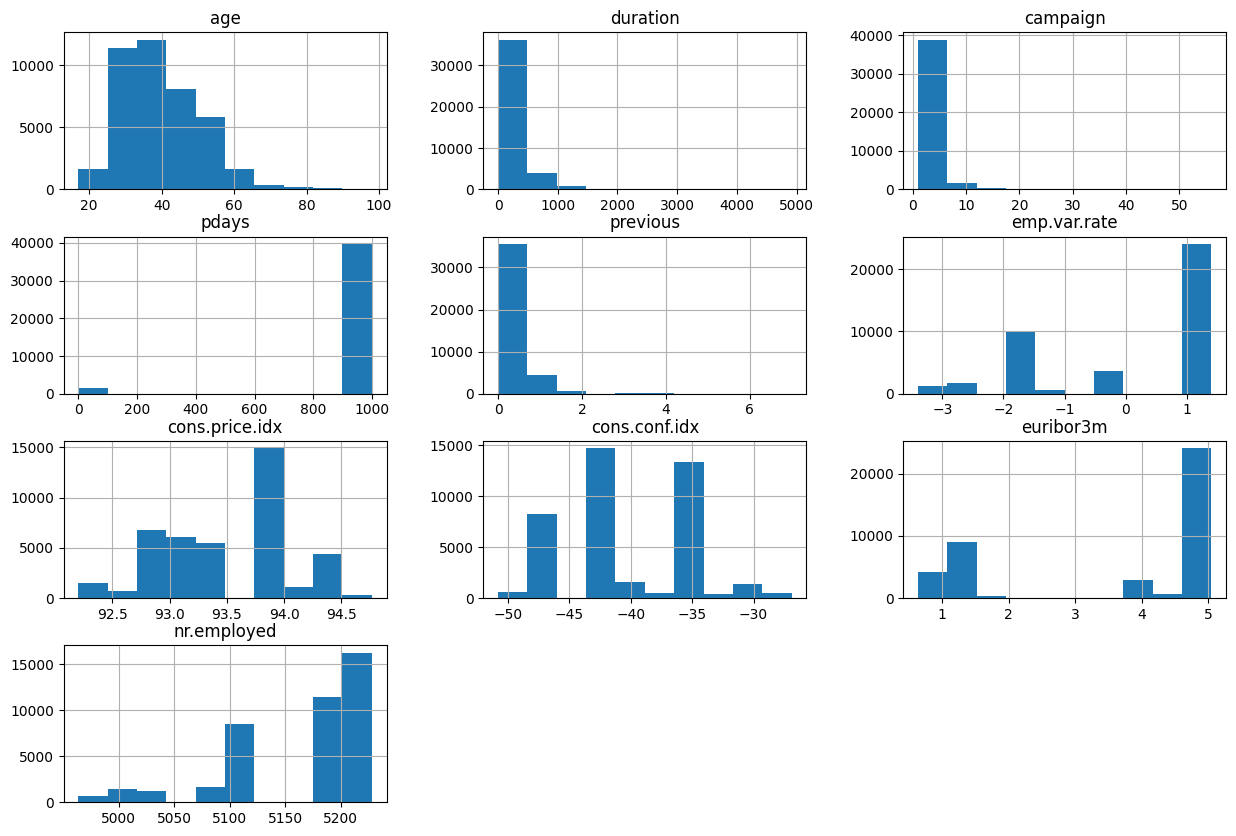

In [ ]:
# plt.figure(figsize=(10,15))
df.hist(figsize=(15,10))
# Distribution of each feature

<Axes: xlabel='education', ylabel='age'>

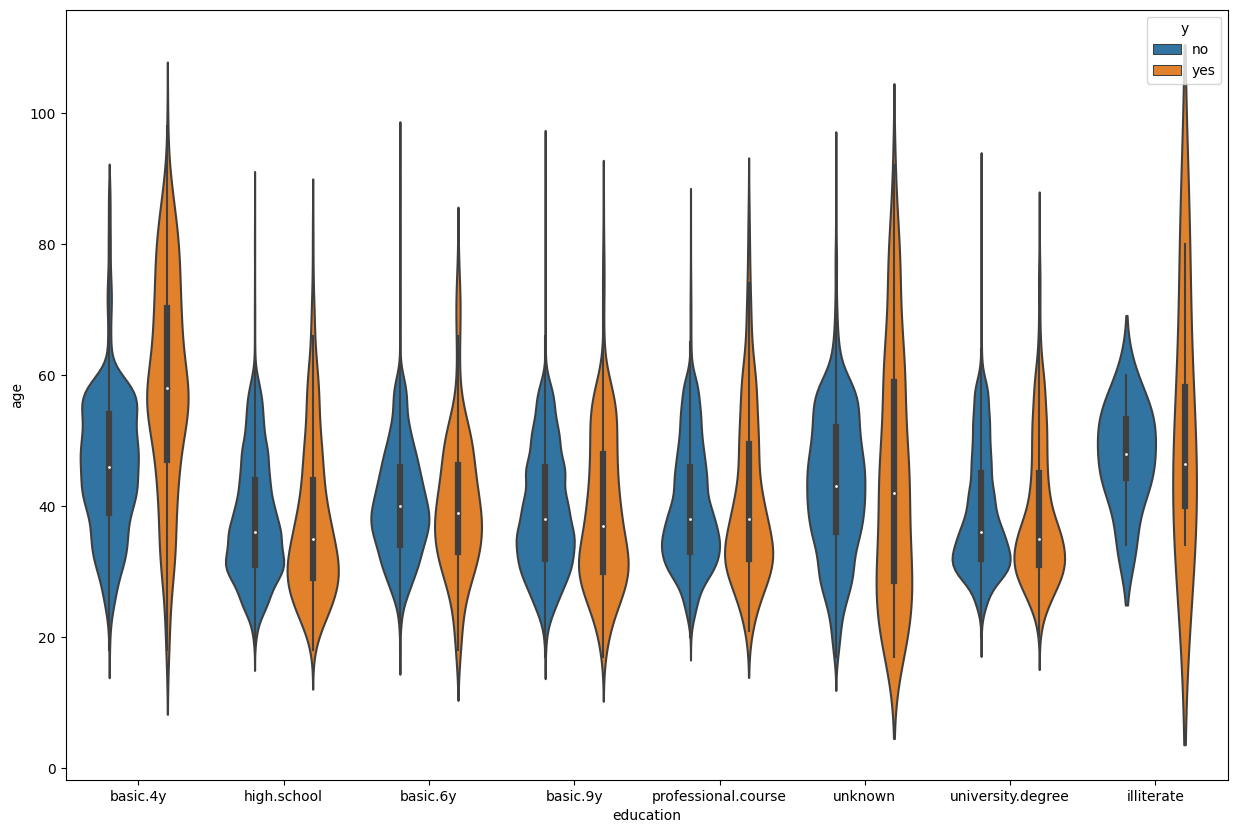

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(data=df,hue="y",y="age", x='education')
# Getting initial insights based on age, education and class label

In [ ]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

### Converting all categorical features in numerical ones

#### Part of Feature Engineering used for encoding


In [ ]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week',
       'poutcome', 'y']

In [ ]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
for col in cols:
    df[col] = label.fit_transform(df[col])

In [ ]:
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


### Seperating the class label and other features

In [ ]:
X=df.iloc[:,:-1]
# Independent feature

In [ ]:
Y=df.iloc[:,-1]
# Class feature(Dependent feature)

### Random Sampling Techniques
- SMOTE(oversampling: increases minority class no by adding synthetic values)(used here)
- ENN(undersampling: reducing the no of values based on similarity in rows)
1.ENN can be used for reducing data entries (vertical) which are very much similar to each other

2.ENN can used in almost every dataset

- We have used SMOTE method to balance by oversampling the data.

In [ ]:
Y.value_counts()

0    36548
1     4640
Name: y, dtype: int64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smoke=SMOTE(sampling_strategy=0.3)

In [ ]:
X,Y=smoke.fit_resample(X,Y)

In [ ]:
Y.value_counts()

0    36548
1    10964
Name: y, dtype: int64

# Treating missing values and outliers

In [ ]:
df.isnull().sum()
# No missing values found

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

# Outliers
#### Detection method
- Box Plot(IQR)
- Z-Score
####  Outlier removal
- Direct Removal of entry
- Remove all outlier values and treat as missing values


#### IQ - Why median is preferred in replacing outliers?
- Beacuse means and mode are affected by outlier to a greater extent than median

<Axes: >

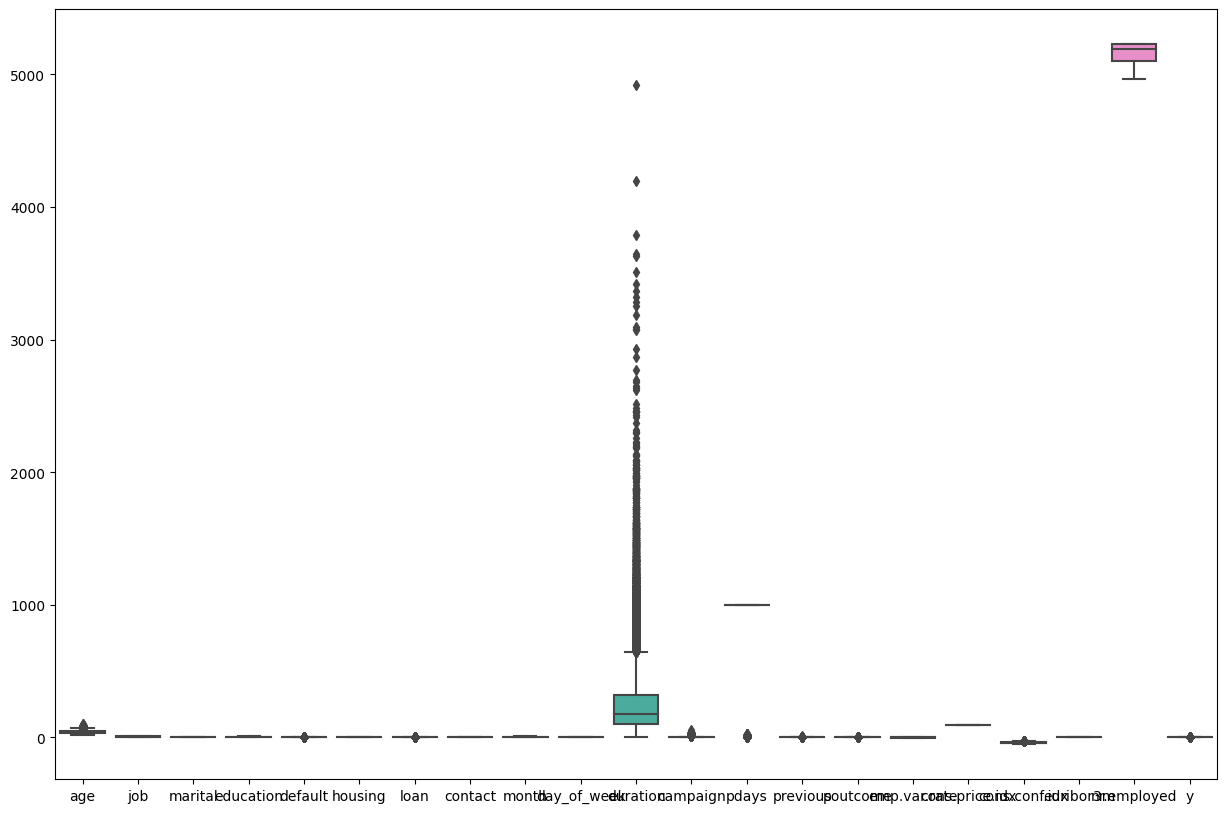

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(data=df)
# Checking for outlier

In [ ]:
df.drop(['duration'],axis=1,inplace=True)
# removed a feature according to discription of dataset

In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

<ipython-input-38-979d0e4a6972>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['pdays'],kde=True)


<Axes: xlabel='pdays', ylabel='Density'>

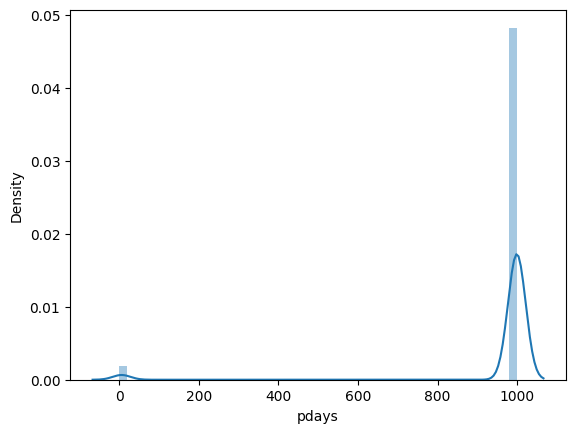

In [ ]:
sns.distplot(df['pdays'],kde=True)

In [ ]:
X.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [ ]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,3,1,0,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,7,1,3,1,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,7,1,3,0,2,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,0,1,1,0,0,0,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,7,1,3,0,0,2,1,6,1,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


## Feature Selection
- Information Gain(used here)

#### Additional data reductional techniques(used for dimension reduction)
- PCA
- LDA

In [ ]:
from sklearn.feature_selection import mutual_info_classif

In [ ]:
imp=mutual_info_classif(X,Y)

In [ ]:
imp

array([0.01876347, 0.02248651, 0.00565992, 0.02853398, 0.02325956,
       0.03087705, 0.00945513, 0.0386257 , 0.0537284 , 0.00649355,
       0.13329708, 0.01316922, 0.05877908, 0.02492882, 0.05874795,
       0.11801474, 0.19849433, 0.19836322, 0.26192747, 0.12819594])

In [ ]:
data = pd.Series(imp, X.columns)

<Axes: >

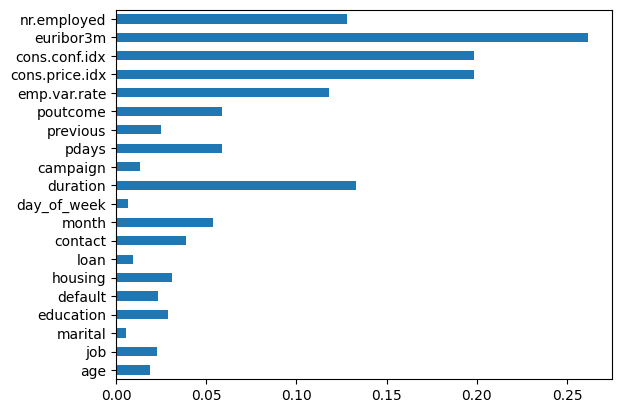

In [ ]:
data.plot(kind = 'barh')

In [ ]:
data.index

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

### Remove the colums whose information gain is less than 0.1


In [ ]:
lst=[]
for i in data.index:
    if data[i] < .01:
        lst.append(i)

In [ ]:
lst

['marital', 'loan', 'day_of_week']

In [ ]:
X.drop(lst,axis=1,inplace=True)

In [ ]:
X.head()

,age,job,education,default,housing,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,0,0,0,1,6,261,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
1,57,7,3,1,0,1,6,149,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
2,37,7,3,0,2,1,6,226,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
3,40,0,1,0,0,1,6,151,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0
4,56,7,3,0,0,1,6,307,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0


### Checking correlation between features

<Axes: >

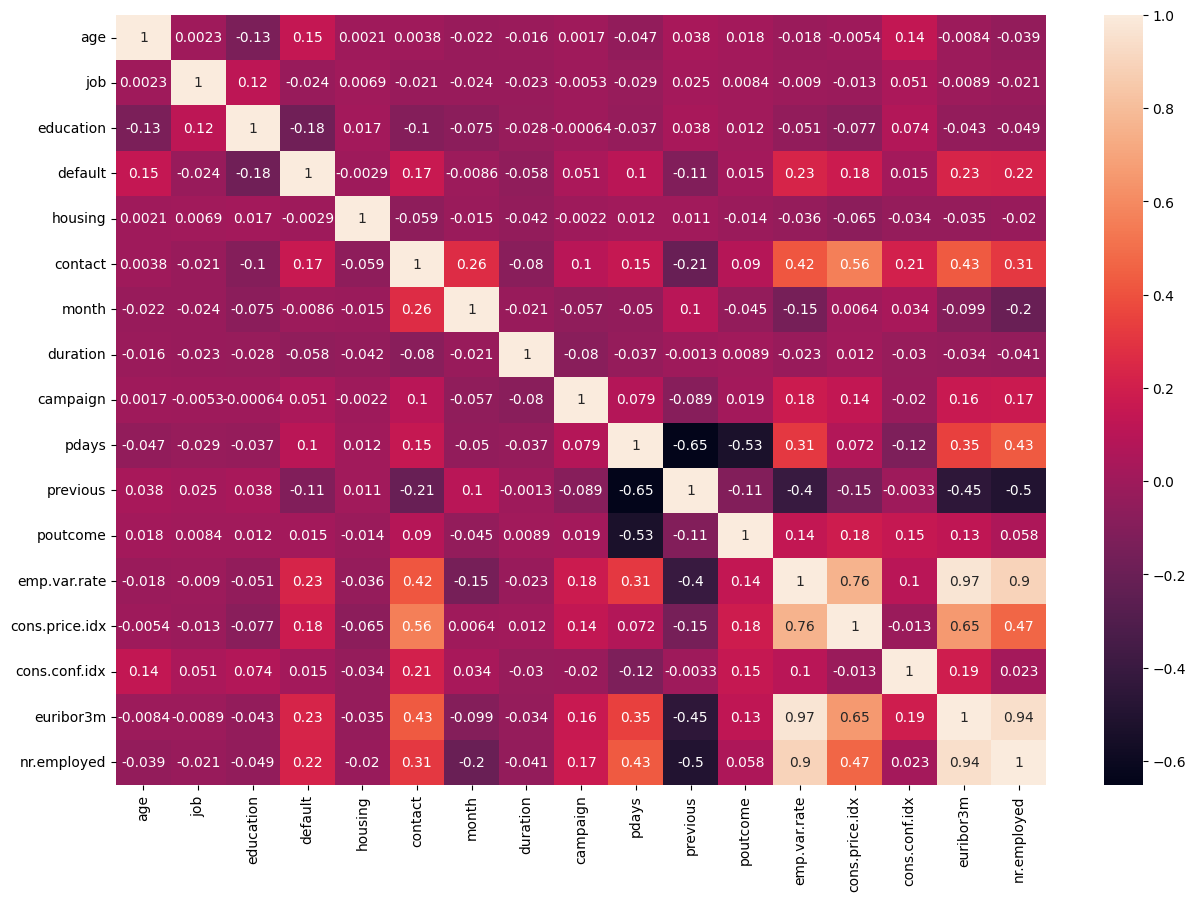

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(X.corr(),annot=True)

   ### If correlation if greater than 0.9, we may drop those features because they can make data baised

In [ ]:
cm=X.corr().abs()

In [ ]:
cm

,age,job,education,default,housing,contact,month,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
age,1.000000,0.002288,0.134393,0.147775,0.002052,0.003798,0.021865,0.016225,0.001740,0.047411,0.038027,0.017962,0.018041,0.005406,0.136058,0.008438,0.039307
job,0.002288,1.000000,0.122251,0.023664,0.006904,0.021335,0.024319,0.022996,0.005342,0.028714,0.025348,0.008433,0.008991,0.012850,0.050904,0.008920,0.021263
education,0.134393,0.122251,1.000000,0.179125,0.016736,0.101245,0.075336,0.027924,0.000641,0.037454,0.038469,0.012357,0.050530,0.077474,0.073672,0.043344,0.048578
default,0.147775,0.023664,0.179125,1.000000,0.002949,0.165030,0.008646,0.057615,0.050556,0.104659,0.109600,0.014559,0.232146,0.175251,0.015250,0.226841,0.221026
housing,0.002052,0.006904,0.016736,0.002949,1.000000,0.058848,0.014830,0.041794,0.002174,0.011538,0.011235,0.014055,0.035843,0.064949,0.034317,0.035207,0.019776
contact,0.003798,0.021335,0.101245,0.165030,0.058848,1.000000,0.264860,0.080204,0.099755,0.151810,0.212667,0.090272,0.416968,0.558302,0.210420,0.427292,0.310635
month,0.021865,0.024319,0.075336,0.008646,0.014830,0.264860,1.000000,0.020579,0.057286,0.050420,0.100841,0.044582,0.153786,0.006383,0.033651,0.098551,0.200707
duration,0.016225,0.022996,0.027924,0.057615,0.041794,0.080204,0.020579,1.000000,0.079900,0.037253,0.001261,0.008906,0.023432,0.011816,0.030212,0.034312,0.040559
campaign,0.001740,0.005342,0.000641,0.050556,0.002174,0.099755,0.057286,0.079900,1.000000,0.078521,0.088830,0.019393,0.176927,0.136041,0.020396,0.163474,0.171205
pdays,0.047411,0.028714,0.037454,0.104659,0.011538,0.151810,0.050420,0.037253,0.078521,1.000000,0.651309,0.530036,0.311164,0.072413,0.123622,0.346340,0.429497


In [ ]:
upper=cm.where(np.triu(np.ones(cm.shape),k=1).astype(np.bool))
to_drop=[c for c in upper.columns if any(upper[c]>0.9)]
X.drop(to_drop, axis=1, inplace=True)


<ipython-input-54-9e456703b941>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper=cm.where(np.triu(np.ones(cm.shape),k=1).astype(np.bool))


In [ ]:
X.columns

Index(['age', 'job', 'education', 'default', 'housing', 'contact', 'month',
       'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx'],
      dtype='object')

### Checking corelation of features with class

In [ ]:
# Joining two dataframes
AA=pd.concat([X,Y],axis=1)

<Axes: >

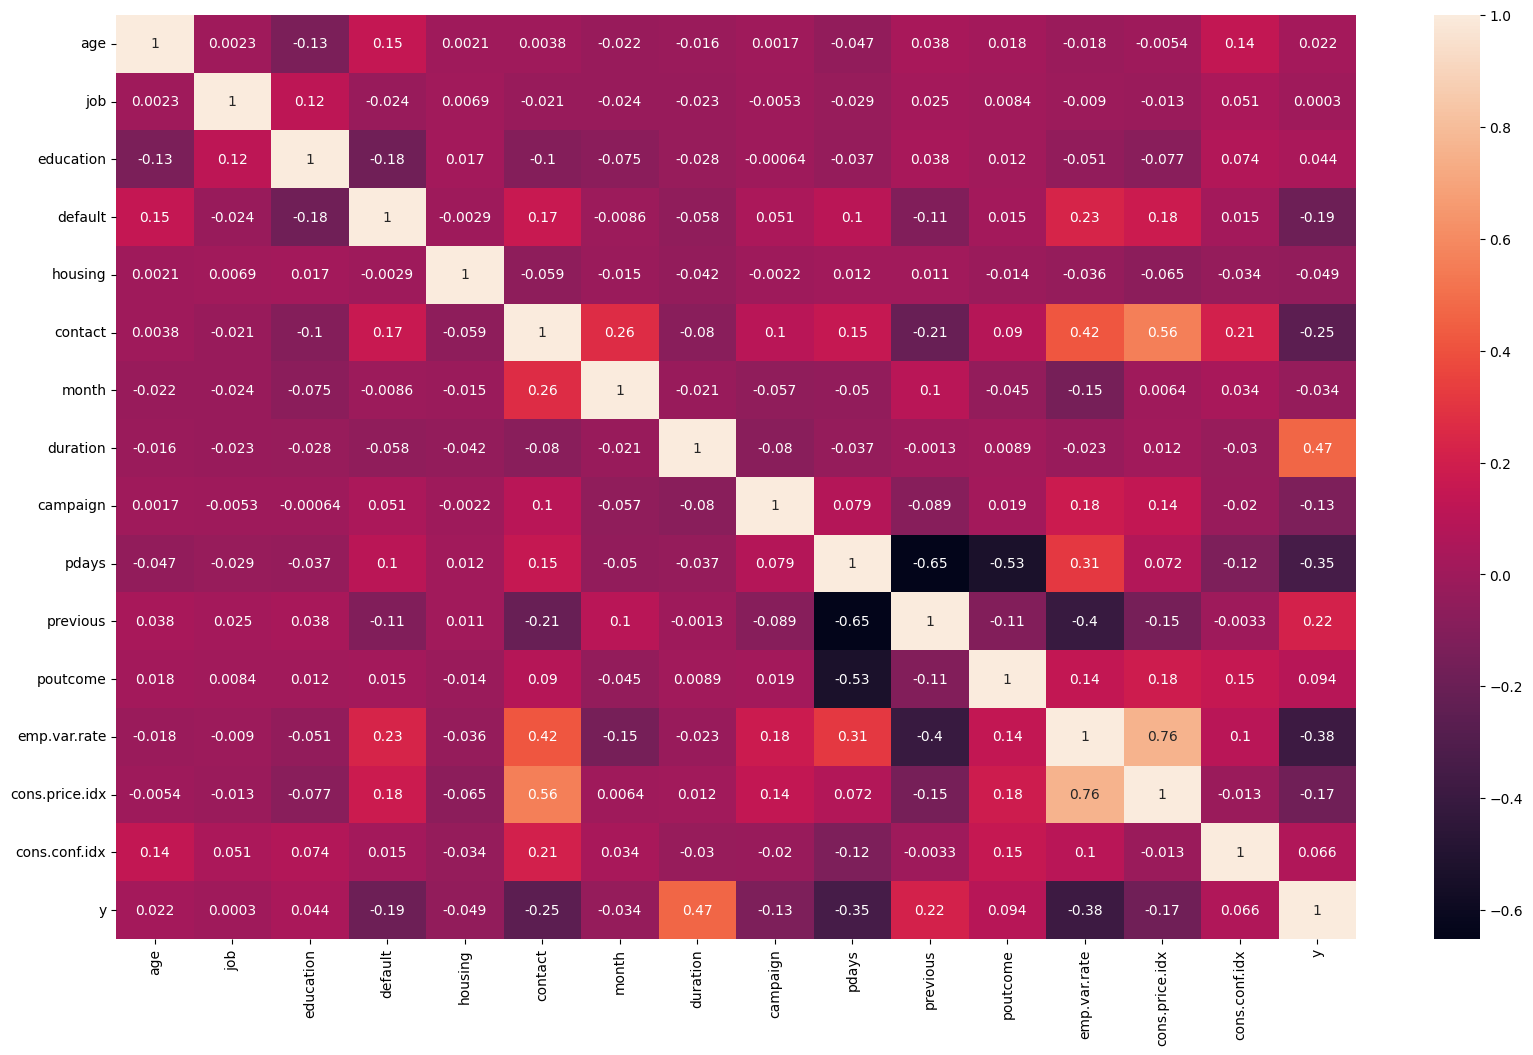

In [ ]:
plt.figure(figsize=(20,12))
sns.heatmap(AA.corr(),annot=True)

# Feature Scalling
- Santdarization(used here)
- Min-Max Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
XX = ss.fit_transform(X)

In [ ]:
XX

array([[ 1.48129061, -0.19603245, -1.7889272 , ...,  0.72882024,
         0.75269555,  0.83352024],
       [ 1.57409553,  0.93549603, -0.3590775 , ...,  0.72882024,
         0.75269555,  0.83352024],
       [-0.28200298,  0.93549603, -0.3590775 , ...,  0.72882024,
         0.75269555,  0.83352024],
       ...,
       [-1.21005223,  0.36973179, -0.3590775 , ..., -2.0177879 ,
        -1.8792405 ,  2.8042106 ],
       [ 0.08921672,  1.21837815,  0.11753907, ..., -1.07960679,
         0.87215406,  0.22725127],
       [-0.56041776,  0.93549603,  0.11753907, ..., -1.84750515,
        -1.60382672,  2.51845921]])

## Modelling Starts From Here

### Training-Testing set split

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(XX,Y,test_size=0.2)

### Dataset splited for both x (feaures) in train and test  and y (class) in train and test in 80:20

# Applying Classification Models

## 1. Logestic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,Y_train)


LogisticRegression()

### Checking fitting of model

In [ ]:
# Saving predictions of training and testing dataset
prd_train= lr.predict(X_train)
prd_test= lr.predict(X_test)

In [ ]:
#Checking accuracy of training and testing dataset to verify best fit of our model
skl.metrics.accuracy_score(Y_train,prd_train)
skl.metrics.accuracy_score(Y_test,prd_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.8803967481385988
0.8831947805956014


# 2. Decision Tree

In [ ]:
dt= skl.tree.DecisionTreeClassifier()

In [ ]:
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [ ]:
prd_train= dt.predict(X_train)
prd_test= dt.predict(X_test)

In [ ]:
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.999947380883475
0.8966642113016942


In [ ]:
# Our model is overfit

# 3. Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train,Y_train)

GaussianNB()

In [ ]:
prd_train= nb.predict(X_train)
prd_test= nb.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.8134389223604935
0.8126907292433968


In [ ]:
# Our model is overfit


# 4.KNN

In [ ]:
knn= skl.neighbors.KNeighborsClassifier(13)

In [ ]:
knn.fit(X_train,Y_train)
prd_train= knn.predict(X_train)
prd_test= knn.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.9067589255176406
0.8970851310112596


In [ ]:
# Our Model is slightly overfit

# 6. Random Forest

In [ ]:
rf = skl.ensemble.RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)
prd_train= rf.predict(X_train)
prd_test= rf.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.9999210713252125
0.9261285909712722


# 7. XG Boost

In [ ]:
from xgboost import XGBClassifier
xb = XGBClassifier()
xb.fit(X_train,Y_train)
prd_train= xb.predict(X_train)
prd_test= xb.predict(X_test)
print(skl.metrics.accuracy_score(Y_train,prd_train))
print(skl.metrics.accuracy_score(Y_test,prd_test))

0.9499329106264306
0.9204461748921393


# Model Evalution Methods
- Confusion Matrix
- Accuracy Score
- Classification Report


In [ ]:
skl.metrics.confusion_matrix(Y_test, prd_test)
#confusion matrix

array([[6969,  338],
       [ 418, 1778]])

In [ ]:
print(skl.metrics.classification_report(Y_test,prd_test))
# Classification Report

              precision    recall  f1-score   support

           0       0.94      0.95      0.95      7307
           1       0.84      0.81      0.82      2196

    accuracy                           0.92      9503
   macro avg       0.89      0.88      0.89      9503
weighted avg       0.92      0.92      0.92      9503

